In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [26]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nelgiriyewithana/global-weather-repository")

print("Dataset downloaded to:", path)

Dataset downloaded to: C:\Users\nurka\.cache\kagglehub\datasets\nelgiriyewithana\global-weather-repository\versions\427


In [27]:
df = pd.read_csv(path + '/GlobalWeatherRepository.csv')

df.head(5)

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [28]:
print(df.columns)

Index(['country', 'location_name', 'latitude', 'longitude', 'timezone',
       'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination'],
      dtype='object')


In [29]:
selected = ['temperature_celsius', 'condition_text', 'wind_kph', 'wind_degree', 'pressure_in', 'precip_in', 'humidity', 'cloud', 'uv_index']

training = df[selected]

training.head(5)

,temperature_celsius,condition_text,wind_kph,wind_degree,pressure_in,precip_in,humidity,cloud,uv_index
0,26.6,Partly Cloudy,13.3,338,29.89,0.00,24,30,7.0
1,19.0,Partly cloudy,11.2,320,29.88,0.00,94,75,5.0
2,23.0,Sunny,15.1,280,29.85,0.00,29,0,5.0
3,6.3,Light drizzle,11.9,215,29.75,0.01,61,100,2.0
4,26.0,Partly cloudy,13.0,150,29.85,0.00,89,50,8.0


In [30]:
x_feat = [col for col in training.columns if col != 'condition_text']

X = training[x_feat]
y = training['condition_text']

In [31]:
y = y.str.lower()

y.unique()

array(['partly cloudy', 'sunny', 'light drizzle', 'clear', 'overcast',
       'moderate or heavy rain with thunder',
       'patchy light rain in area with thunder', 'fog',
       'patchy light rain with thunder', 'patchy rain nearby',
       'light rain', 'mist', 'cloudy', 'thundery outbreaks in nearby',
       'moderate rain', 'light rain shower', 'moderate rain at times',
       'moderate or heavy rain shower', 'heavy rain at times',
       'patchy light rain', 'patchy light drizzle',
       'thundery outbreaks possible', 'patchy rain possible',
       'moderate or heavy rain in area with thunder', 'heavy rain',
       'torrential rain shower', 'freezing fog',
       'moderate or heavy snow showers', 'light sleet', 'blizzard',
       'moderate snow', 'light snow', 'light sleet showers',
       'light freezing rain', 'heavy snow', 'blowing snow',
       'patchy heavy snow', 'light snow showers',
       'moderate or heavy sleet', 'patchy light snow'], dtype=object)

In [32]:
import requests

response = requests.get("https://www.weatherapi.com/docs/weather_conditions.json")

label = pd.DataFrame(response.json())

In [33]:
label_select_dict = {}

for index, row in label.iterrows():
    label_select_dict[row['night'].lower()] = row['code']
    label_select_dict[row['day'].lower()] = row['code']

y_encode = y.map(label_select_dict)

In [34]:
weather_mapping = {
    'Clear': [1000],
    'Cloudy': [1003, 1006, 1009],
    'Drizzle': [1150, 1153, 1168, 1171, 1180],
    'Rain': [1063, 1183, 1186, 1189, 1192, 1195, 1240, 1243, 1246],
    'Storm/Thunder': [1087, 1273, 1276, 1279, 1282],
    'Snow': [1066, 1210, 1213, 1216, 1219, 1222, 1225, 1255, 1258],
    'Sleet': [1069, 1072, 1204, 1207, 1249, 1252],
    'Fog': [1030, 1135, 1147],
    'Extreme Weather': [1114, 1117, 1237]
}

flat_mapping = {code: category for category, codes in weather_mapping.items() for code in codes}

y_encode_transform = y_encode.map(flat_mapping)

In [35]:
label_counts = pd.DataFrame(y_encode_transform).value_counts()
print(label_counts)

condition_text 
Cloudy             16876
Clear              13723
Rain                2641
Fog                 1230
Storm/Thunder        620
Drizzle              405
Snow                  57
Sleet                 13
Extreme Weather        5
dtype: int64


In [36]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y_encode_transform)

In [37]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(k_neighbors=4, random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X, y_encoded)

# pd.DataFrame(y_resampled).value_counts()

In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y_encoded, test_size=.1, random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((35108, 8), (3901, 8), (35108,), (3901,))

In [39]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# x_train_scaled = scaler.fit_transform(x_train)
# x_test_scaled = scaler.transform(x_test)

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [49]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(48, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(len(np.unique(y_encoded)), activation='softmax'),    
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [50]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 64)                576       
                                                                 
 batch_normalization_8 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_11 (Dense)            (None, 48)                3120      
                                                                 
 batch_normalization_9 (Batc  (None, 48)               192       
 hNormalization)                                                 
                                                                 
 dense_12 (Dense)            (None, 32)                1568      
                                                                 
 batch_normalization_10 (Bat  (None, 32)              

In [51]:
from tensorflow.keras.callbacks import Callback

class CustomEarlyStopping(Callback):
    def on_epoch_end(self, epoch, logs):
        if logs['accuracy'] >= 0.880 and logs['val_accuracy'] >= 0.8790:
            self.model.stop_training = True

custom_early_stopping = CustomEarlyStopping()

In [52]:
history = model.fit(x_train_scaled, y_train, batch_size=64, epochs=100, validation_data=(x_test_scaled, y_test), verbose=1, callbacks=[custom_early_stopping])

Epoch 1/100
549/549 [==============================] - 4s 3ms/step - loss: 1.0196 - accuracy: 0.7272 - val_loss: 0.7505 - val_accuracy: 0.7844
Epoch 2/100
549/549 [==============================] - 1s 2ms/step - loss: 0.7000 - accuracy: 0.7869 - val_loss: 0.6460 - val_accuracy: 0.7957
Epoch 3/100
549/549 [==============================] - 1s 2ms/step - loss: 0.6370 - accuracy: 0.7936 - val_loss: 0.6071 - val_accuracy: 0.8034
Epoch 4/100
549/549 [==============================] - 1s 3ms/step - loss: 0.5953 - accuracy: 0.8054 - val_loss: 0.5872 - val_accuracy: 0.8088
Epoch 5/100
549/549 [==============================] - 1s 2ms/step - loss: 0.5655 - accuracy: 0.8135 - val_loss: 0.5514 - val_accuracy: 0.8165
Epoch 6/100
549/549 [==============================] - 1s 2ms/step - loss: 0.5474 - accuracy: 0.8180 - val_loss: 0.5497 - val_accuracy: 0.8208
Epoch 7/100
549/549 [==============================] - 1s 2ms/step - loss: 0.5285 - accuracy: 0.8215 - val_loss: 0.5345 - val_accuracy: 0.8195

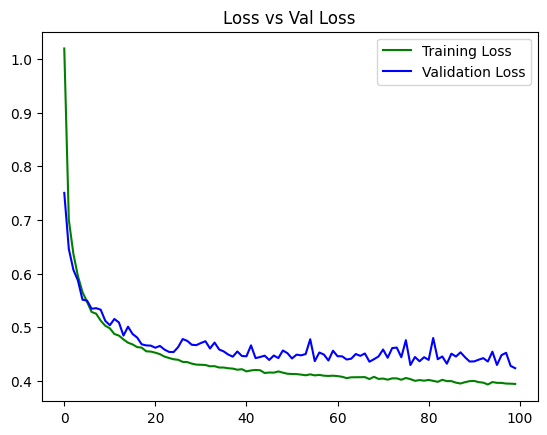

In [53]:
plt.plot(history.history['loss'], color='g', label='Training Loss')
plt.plot(history.history['val_loss'], color='b', label='Validation Loss')
plt.title("Loss vs Val Loss")
plt.legend()
plt.show()

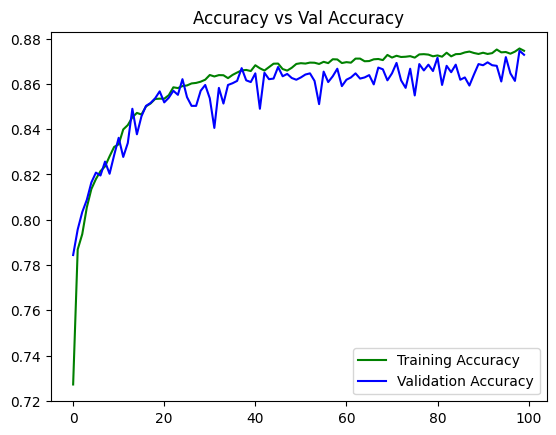

In [54]:
plt.plot(history.history['accuracy'], color='g', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='b', label='Validation Accuracy')
plt.title("Accuracy vs Val Accuracy")
plt.legend()
plt.show()

In [55]:
from sklearn.metrics import classification_report

y_pred = np.argmax(model.predict(x_test_scaled), axis=1)
print(classification_report(y_test, y_pred))

122/122 [==============================] - 0s 918us/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1388
           1       0.83      0.96      0.89      1658
           2       0.33      0.03      0.05        37
           3       0.00      0.00      0.00         1
           4       0.88      0.43      0.58       142
           5       0.64      0.47      0.54       257
           7       0.57      0.67      0.62         6
           8       0.50      0.02      0.03        64
           9       0.80      0.73      0.76       348

    accuracy                           0.87      3901
   macro avg       0.62      0.48      0.49      3901
weighted avg       0.86      0.87      0.86      3901



c:\Users\nurka\.conda\envs\Tensor\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nurka\.conda\envs\Tensor\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nurka\.conda\envs\Tensor\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
# model.save('classification.h5')